In [ ]:
!pip install signate

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth


auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'signate.json'", fields="files(id)").execute()
signate_api_key = results.get('files', [])

filename = "/root/.signate/signate.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=signate_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

     |████████████████████████████████| 138 kB 9.9 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=1793af1e503a4cae5fd375b9fd89d8f2cb7085a99cf38672d7babc9870c7ce31
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Download 100%.


In [ ]:
! signate list

  competitionId  title                                                                                      closing     prize                  submitters
---------------  -----------------------------------------------------------------------------------------  ----------  -------------------  ------------
              1  【練習問題】銀行の顧客ターゲティング                                                       -                                        5298
             24  【練習問題】お弁当の需要予測                                                               -                                        6540
             27  【練習問題】Jリーグの観客動員数予測                                                        -                                        1487
            100  【練習問題】手書き文字認識                                                                 -           Knowledge                     199
            102  【練習問題】タイタニックの生存予測                                                         -           Knowledge                    1184
 

In [ ]:
! signate files --competition-id=520
! signate download --competition-id=520

  fileId  name                                           title                                                     size  updated_at
--------  ---------------------------------------------  ----------------------------------------------------  --------  -------------------
    2350  PBL05_h_exercise4_question.pdf                 PBL05_不良個所自動検出(木材)_h.演習④設問               1176226  2021-09-08 18:20:38
    2351  PBL05_i_exercise4_supplementary-documents.pdf  PBL05_不良個所自動検出(木材)_i.演習④ガイドコンテンツ   1053620  2021-09-08 18:20:40
    2381  README.md                                      配布データの説明用テキスト                                3135  2021-09-09 12:16:16
    2383  train.zip                                      1. 学習用                                             82694303  2021-09-09 15:10:26
    2384  test.zip                                       2. 評価用                                             91644093  2021-09-09 14:26:59
    2385  sample_submission.zip                          3. コンペ投稿用         

In [ ]:
! unzip train.zip
! unzip train/train_annotations.zip 
! unzip train/train_images.zip
! unzip test.zip
! unzip test/test_images.zip
! unzip sample_submission.zip

Archive:  train.zip
   creating: train/
  inflating: train/train.csv         
  inflating: train/train_annotations.zip  
 extracting: train/train_images.zip  
Archive:  train/train_annotations.zip
   creating: train_annotations/
  inflating: train_annotations/train_63_04.png  
  inflating: train_annotations/train_63_10.png  
  inflating: train_annotations/train_63_11.png  
  inflating: train_annotations/train_63_05.png  
  inflating: train_annotations/train_63_07.png  
  inflating: train_annotations/train_63_06.png  
  inflating: train_annotations/train_63_02.png  
  inflating: train_annotations/train_63_03.png  
  inflating: train_annotations/train_63_01.png  
  inflating: train_annotations/train_63_00.png  
  inflating: train_annotations/train_31_05.png  
  inflating: train_annotations/train_31_04.png  
  inflating: train_annotations/train_31_03.png  
  inflating: train_annotations/train_31_02.png  
  inflating: train_annotations/train_31_00.png  
  inflating: train_annotations/train

In [ ]:
! ls

adc.json				       test
PBL05_h_exercise4_question.pdf		       test_images
PBL05_i_exercise4_supplementary-documents.pdf  test.zip
README.md				       train
sample_data				       train_annotations
sample_submission			       train_images
sample_submission.zip			       train.zip


In [ ]:
! ls train_images

train_00_00.png  train_17_14.png  train_38_04.png  train_62_08.png
train_01_00.png  train_17_15.png  train_39_00.png  train_62_09.png
train_01_01.png  train_18_00.png  train_39_01.png  train_62_10.png
train_01_02.png  train_19_00.png  train_39_02.png  train_62_11.png
train_01_03.png  train_19_01.png  train_39_03.png  train_62_12.png
train_01_04.png  train_19_02.png  train_39_04.png  train_62_13.png
train_01_05.png  train_19_03.png  train_39_05.png  train_62_14.png
train_01_06.png  train_19_04.png  train_40_00.png  train_62_15.png
train_01_07.png  train_20_00.png  train_40_01.png  train_63_00.png
train_01_08.png  train_20_01.png  train_40_02.png  train_63_01.png
train_01_09.png  train_20_02.png  train_41_00.png  train_63_02.png
train_01_10.png  train_20_03.png  train_41_01.png  train_63_03.png
train_01_11.png  train_20_04.png  train_42_00.png  train_63_04.png
train_01_12.png  train_20_05.png  train_42_01.png  train_63_05.png
train_01_13.png  train_20_06.png  train_42_02.png  train_63_06

# Canny Edge

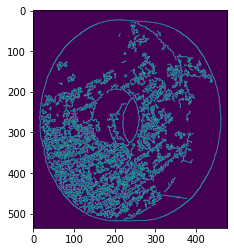

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2


# 画像の読み込み
image = cv2.imread('./train_images/train_31_00.png')

class Canny():
  def __call__(self, image):
    # グレースケール化
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Cannyエッジ検出
    image_edges = cv2.Canny(image_gray,20,80)

    return image_edges

canny = Canny()

canny_image = canny(image)


plt.imshow(canny_image)
plt.show()